# Introduction to image processing in Python
#### 25th January 2017

Today we are going to look at some image processing. We will be learning how to import images and manipulate them.

You will be able to follow along with this workbook.

Feel free to experiment to understand how these functions work.


Let's start by loading in the libraries that we will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

This first line makes sure our images are displayed within this notebook instead of a separate window. The second line sets makes the images bigger than the default size - don't worry about these.

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 12.0)

We can load in our first image like this:

https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imread

In [3]:
image = io.imread("bird.jpg")

Because it is in the current directory we can just write the name of the image file in the argument. If the image was somewhere else we would specify the full path to the image.



Let's display this image. We can do this using a function from the matplotlib.pyplot library. Remember, because the function belongs to the library we have to specify the library as we imported it. 

imshow will display the image on some axes.

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow

show will display the figure.

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show

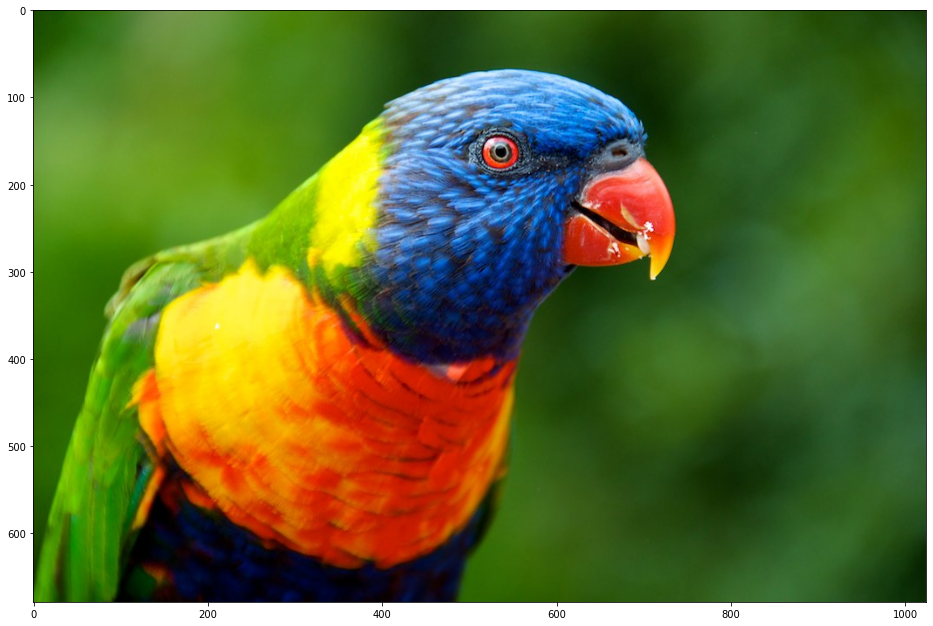

In [4]:
plt.imshow(image)
plt.show()

#### Print out the variable 'image' in the cell below.
Why does it look like this?

In [5]:
print(image)

[[[ 20  70   0]
  [ 21  71   0]
  [ 21  71   0]
  ...
  [ 22  55   8]
  [ 21  54   7]
  [ 20  53   6]]

 [[ 20  70   0]
  [ 21  71   0]
  [ 21  71   0]
  ...
  [ 23  56   9]
  [ 22  55   8]
  [ 21  54   7]]

 [[ 21  71   0]
  [ 21  71   0]
  [ 22  72   0]
  ...
  [ 23  56   9]
  [ 23  56   9]
  [ 23  56   9]]

 ...

 [[ 50 127   0]
  [ 56 133   1]
  [ 63 140   2]
  ...
  [ 12  42   4]
  [ 11  41   3]
  [ 11  41   3]]

 [[ 49 126   0]
  [ 55 132   0]
  [ 62 139   1]
  ...
  [ 12  42   4]
  [ 11  41   3]
  [ 11  41   3]]

 [[ 50 127   0]
  [ 55 132   0]
  [ 62 139   1]
  ...
  [ 12  42   4]
  [ 11  41   3]
  [ 11  41   3]]]


What is the size of the array?

In [6]:
print(image.shape)

(679, 1024, 3)


What is the variable type?

In [7]:
print(image.dtype)

uint8


Let's make a copy of this array. 

Assignment statments like B = A do not copy the object but create a binding between the object and the target so that changes to B will also make changes to A. Sometimes we need to use "copy" instead so that we can change one object without changing the other. In this case B = A.copy()

If we were using a list instead of an array we could say B = A[:]

You can try this out in the cell below:

In [8]:
a = np.array([1,2,3])
b = a
b[1] = 5
print("a = {}, b = {}".format(a, b))

c = np.array([1,2,3])
d = c.copy()
d[1] = 5
print("c = {}, d = {}".format(c, d))

e = [1,2,3]
f = e[:]
f[1] = 5
print("e = {}, f = {}".format(e, f))

a = [1 5 3], b = [1 5 3]
c = [1 2 3], d = [1 5 3]
e = [1, 2, 3], f = [1, 5, 3]


Back to copying our array. Let's copy our image to a new array called "blue_image".

We will make some changes to some of the values in our new array. What affect does this have?

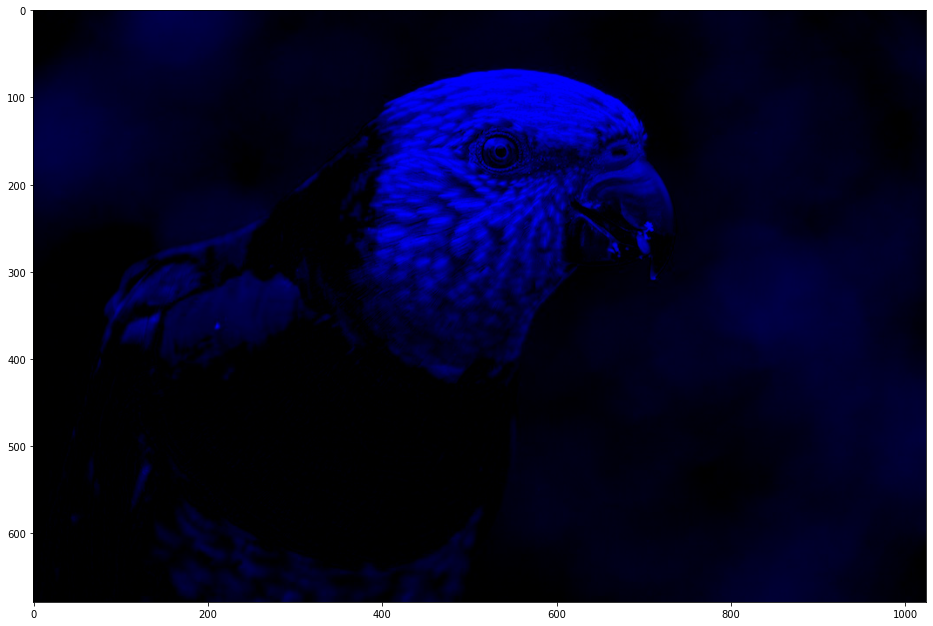

In [9]:
blue_image = image.copy()
blue_image[:, :, 0] = 0

blue_image[:, :, 1] = 0
plt.imshow(blue_image)
plt.show()

Leave only the blue channel in this array.

Now, do something similar to generate a green image and a red image.

In [10]:
#green_image = image.copy()
#green_image[:, :, 0] = 0
#green_image[:, :, 2] = 0

#red_image = image.copy()
#red_image[:, :, 1] = 0
#red_image[:, :, 2] = 0

#### Plot all of your images in 2x2 grid of subplots.

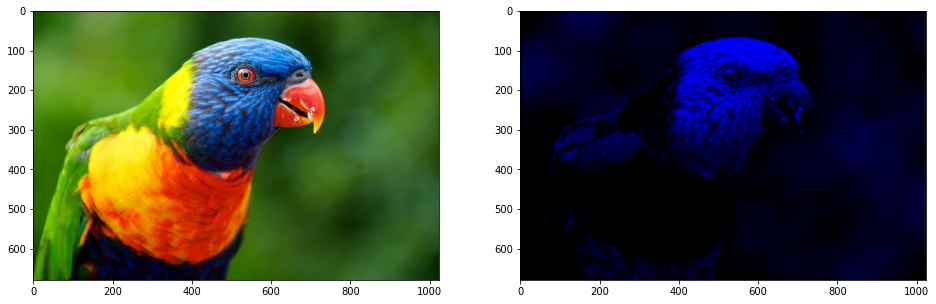

In [11]:
fig = plt.figure()

ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#ax3 = fig.add_subplot(223)
#ax4 = fig.add_subplot(224)

ax.imshow(image)
ax2.imshow(blue_image)

#ax3.imshow(blue_image)
#ax4.imshow(green_image)

plt.show()

Instead, let's take the average value over our three colour channels.

What does this look like?

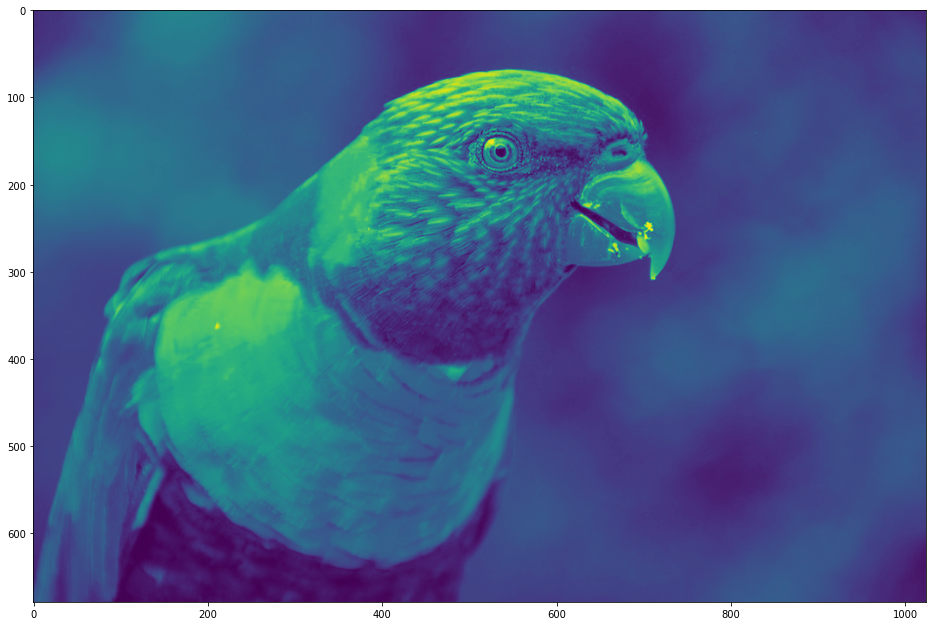

In [12]:
mean_image = np.mean(image, -1)

plt.imshow(mean_image)
plt.show()

In the cell above we applied the "mean" function to an array. The second argument gave the axis. In the example above "-1" refers to the last axis

You can explore what this means using the array below:

In [13]:
#understanding mean applied to an axis

a = np.linspace(0,24,25)
a.shape=(5,5)
print(a)


[[ 0.  1.  2.  3.  4.]
 [ 5.  6.  7.  8.  9.]
 [10. 11. 12. 13. 14.]
 [15. 16. 17. 18. 19.]
 [20. 21. 22. 23. 24.]]


What is the mean of the whole array?

What is the mean along the 0th axis and 1st axis?

In [14]:
# np.mean(a)
# np.mean(a,0)
# np.mean(a,1)
# np.mean(a,-1)

We can flatten the image more easily using the keyword agument "flatten" like this:

In [15]:
image = io.imread("bird.jpg",as_gray=True)

Or we could extract just the red channel from an image like this:

In [16]:
image = io.imread("bird.jpg")
red_image = image[:,:,0]

## Let's explore some colourmaps

In this part we will look at different colourmaps.

http://matplotlib.org/users/colormaps.html

Load in the image "warhol.jpg". Make sure to flatten it.
We can change the colourmap that is used by "imshow" using the keyword argument "cmap".

We can also add the colourbar to the plot as shown below.

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colorbar

The first argument of "colorbar" is the object to which the colourbar is applied.
Here, we have set it to be one of the subplots.
The "ax" keyword tells us which axes object (subplot) space will be stolen from in order to fit in the colourbar.

#### Try some of these colourmaps:

viridis, inferno, plasma, magma, Blues, BuGn, BuPu, GnBu, Greens, Greys, Oranges, OrRd, PuBu, PuBuGn, PuRd, Purples, RdPu, Reds, YlGn, YlGnBu, YlOrBr, YlOrRd, afmhot, autumn, bone, cool, copper, gist_heat, gray, hot, pink, spring, summer, winter, BrBG, bwr, coolwarm, PiYG, PRGn, PuOr, RdBu, RdGy, RdYlBu, RdYlGn, Spectral, seismic, Accent, Dark2, Paired, Pastel1, Pastel2, Set1, Set2, Set3, gist_earth, terrain, ocean, gist_stern, brg, CMRmap, cubehelix, gnuplot, gnuplot2, gist_ncar, nipy_spectral, jet, rainbow, gist_rainbow, hsv, flag, prism

#### What happens if you put "_r" after the name?


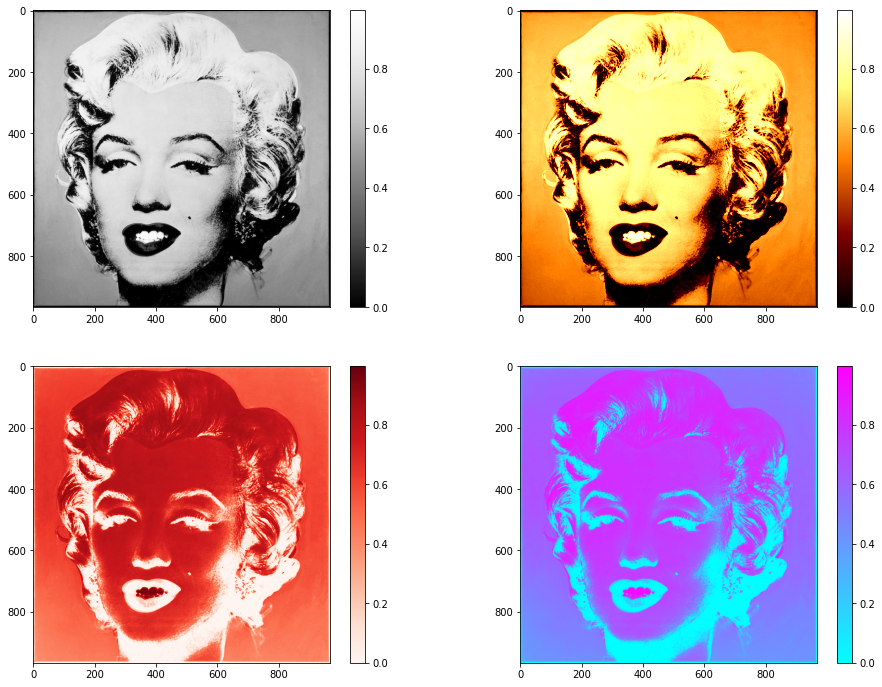

In [18]:
im = io.imread("warhol.jpg",as_gray=True)

fig = plt.figure()
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

cax = ax.imshow(im, cmap="Greys_r")
cax2 = ax2.imshow(im, cmap="afmhot")
cax3 = ax3.imshow(im, cmap="Reds")
cax4 = ax4.imshow(im, cmap="cool")

cbar = fig.colorbar(cax, ax=ax)
cbar = fig.colorbar(cax2, ax=ax2)
cbar = fig.colorbar(cax3, ax=ax3)
cbar = fig.colorbar(cax4, ax=ax4)

plt.show()

## Let's make a stamp

In this part we will make a stamp from a picture of the queen.

You will learn about cropping images and flipping images.

We will need:

A picture of the queen - You can use the one here (thequeen.jpg) or find your own.... So it's not too easy you need to find one where she is facing in the wrong direction.

Display your image below:


In [ ]:
im = io.imread("thequeen.jpg")
plt.imshow(im)
plt.show()

We need to crop this image.
We can select just the elements we want from the array

In [ ]:
cropped = im[175:400, 50:350]

plt.imshow(cropped)
plt.show()

The queen is still facing the wrong direction.
We will need to flip the image.
We can do this quite easily using the "fliplr" function from numpy. fliplr takes one argument which is the array.

https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.fliplr.html

#### Flip the image and display it below.

#### What does flipud do?

In [ ]:
flipped = np.fliplr(cropped)
plt.imshow(flipped)
plt.show()

Note: fliplr(A) is the same as saying A[:,::-1] which is like reading the array backwards

How would you write flipud this way?

#### Give this image a suitable colourmap and also add a border around the image by changing the value of these array elements.

In [ ]:
grey_queen = np.mean(flipped, -1)

grey_queen[0:10, :] = 255
grey_queen[:, 0:10] = 255

lx, ly = grey_queen.shape

grey_queen[lx - 10:lx, :] = 255
grey_queen[:, ly - 10:ly] = 255

plt.imshow(grey_queen, cmap="Reds_r")
plt.show()

#### Display your original image and your stamp side by side.

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.imshow(im)
ax2.imshow(grey_queen, cmap="Reds_r")
plt.show()

## A view to a kill


In this part we will be recreating the iconic opening from James Bond.

We will learn about shifting images and applying masks.

To do this we will need to import a function from a different library.

#### Import the interpolation function from scipy.ndimage

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.shift.html#scipy.ndimage.shift


In [ ]:
from scipy.ndimage import interpolation

#### Load in the image called "bond.png". Make sure you flatten the array.

#### Display the image.

In [ ]:
im = io.imread("bond.png", as_gray=True)

plt.imshow(im,cmap="Greys_r")
plt.show()

We need to put Bond in the centre of the image. To do this we will use the "shift" function that belongs to interpolation. The arguments to this function indicate the image that will be shifted, the shifts as a sequence giving the shift for each axis and information about how points outside the boundary of the image should be displayed.

#### Try out the shift below and find the shift needed to put Bond in the centre of image.

In [ ]:
shifted_image = interpolation.shift(im, (60, -300), mode="nearest")

In [ ]:
plt.imshow(shifted_image,cmap="Greys_r")
plt.show()

We are now going to create a mask for the image. Later on we will set everything covered by the mask to a certain value.

Here we want to make a circular mask.

How is this mask made? Print out some of the variables to get an idea.

What are the values in the mask?

Change some of the numbers to change the shape of the mask.

In [ ]:
lx, ly = shifted_image.shape
X, Y = np.ogrid[0:lx, 0:ly]

mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4

plt.imshow(mask)
plt.show()

Let's set all of the values covered by the mask to zero

In [ ]:
shifted_image[mask] = 0

#### Display the image below.

In [ ]:
plt.imshow(shifted_image,cmap="Greys_r")
plt.show()

## Photographic evidence

In this part we will perpetrate a hoax a create a more realistic bigfoot sighting.

You will learn about blurring images and rotating images.

#### We will be using the "ndimage" library from scipy. Import it below.

In [ ]:
from scipy import ndimage

Load in bigfoot.jpg below and display the image.

In [ ]:
im = io.imread("bigfoot.jpg", as_gray=True)
plt.imshow(im, cmap="Greys_r")
plt.show()

This isn't very convincing is it?

Let's blur the image a bit.

To do this we will use the "gaussian_filter" function that belongs to "ndimage".

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.gaussian_filter.html?highlight=gaussian_filter#scipy.ndimage.gaussian_filter

This might be a bit too blurry. Try using a different value.

In [ ]:
blur = ndimage.gaussian_filter(im, sigma=7.5)
plt.imshow(blur, cmap="Greys_r")
plt.show()

Ok, that's a bit better but a it might be more realistic if the image was a bit wonky.

Let's rotate the image. We can do this using the "rotate" function from "ndimage".

https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.rotate.html?highlight=scipy%20ndimage%20interpolation%20rotate

Try using different values.

In [ ]:
rotated = ndimage.rotate(blur, -5, reshape=True)
plt.imshow(rotated, cmap="Greys_r")
plt.show()

That looks a bit better but needs to be cropped so that the outside of the original image is not visible.

#### Crop the array and display it below.

In [ ]:
cropped = rotated[100:700, 100:1100]
plt.imshow(cropped, cmap="Greys_r")
plt.show()

## Haunting a house

In this part we will be squashing a ghost into a house! You will learn how to overlay images and how to resize an image.

First, load in "ghost.jpg" and "room.jpg" and display these images.

We can display mutliple plots at the same time. Anything we plot before calling plt.show() will appear on the same figure. However, underlying images may be obscured by subsequent images. We can use the keyword "alpha" to set the transparency of an image. 

Try changing the alpha value for the image below.

In [ ]:
im_ghost = io.imread("ghost.jpg",as_gray=True)
im_room = io.imread("room.jpg",as_gray=True)

plt.imshow(im_room, cmap="Greys_r")
plt.imshow(im_ghost, alpha=0.5, cmap="Greys_r")
plt.show()

Hmmm, this ghost is both terrifying and far too big.

We need to resize the ghost so that it matches the size of the room.

Get the dimensions of the room image and save them to the variables "lx" and "ly". Remember, we did this before for our James Bond image.

In [ ]:
lx, ly = im_room.shape

We can resize our image using "imresize" from "misc".

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.misc.imresize.html

The first argument of "imresize" is the image we want to resize and the second is a tuple giving the dimensions of the resized image. Here, they are the dimensions of our room image.

#### Plot the room and the resized ghost image.

In [ ]:
resized_ghost = resize(im_ghost, (lx, ly))

plt.imshow(im_room, cmap="Greys_r")
plt.imshow(resized_ghost, alpha=0.25, cmap="Greys_r")
plt.show()

Spooky?!

## Histograms

In this part we will look at distribution of values within an image and how to display different window levels.

First we will load in the image "newyork.png".

To see the distribution of values in this image we can plot a histogram of the values. To do this we can use the "hist" function from matplotlib.pyplot.

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

To plot the histogram, we need to flatten the 2d array. An array A, can be flattened using A.flatten()

What is unusual about this image?
Try changing some of the parameters in the histogram.

In [ ]:
im = io.imread("newyork.png",as_gray=True)

fig = plt.figure()

ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax.imshow(im, interpolation="none", cmap="Greys_r", vmin=0.5, vmax=0.8)
ax2.hist(im.flatten(),bins=255,facecolor="Red",edgecolor="Black")

plt.show()

We can display a specific window of an image using the keywords "vmin" and "vmax".

#### Find the maximum and minimum values of the array.
#### Try displaying the image with different values of vmin and vmax.
#### Try this for some of the other images we have looked at.

In [ ]:
print(np.min(im), np.max(im))

plt.imshow(im, cmap="Greys_r", vmin=0.0, vmax=1.0)
plt.show()

We will use this (and some of the other stuff we have learnt in this session) this afternoon when we start to process some clinical medical images...